In [1]:
import numpy as np

In [3]:
rand = np.random.RandomState(42)

In [9]:
x = rand.randint(100,size=10)

In [10]:
x

array([71, 60, 20, 82, 86, 74, 74, 87, 99, 23])

In [12]:
# To access 3 different element
[x[2],x[3],x[6]]

[20, 82, 74]

In [13]:
# Or we can
l = [2,3,6]
x[l]

array([20, 82, 74])

In [14]:
# With fancy indexing, the shape of the result reflects 
# the shape of the index arrays
# rather than the shape of the array being indexed
ind = np.array([[3, 7],
[4, 5]])
x[ind]

array([[82, 87],
       [86, 74]])

In [15]:
# Fancy indexing also works in multiple dimensions.
X = np.arange(12).reshape((3,4))

In [16]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
row = np.array([0,1,2])
col = np.array([2,1,3])

In [59]:
X[row,col]

array([ 2,  5, 11])

In [60]:
X[2,[0,1,2]]

array([ 8,  9, 10])

In [61]:
X[1:,[0,2,1]]

array([[ 4,  6,  5],
       [ 8, 10,  9]])

In [65]:
X[row[:,np.newaxis]]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

In [66]:
X[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [69]:
row[:,np.newaxis] * col # Broadcasting

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Example: Selecting Random Points

Plotting and Charing will be discussed in Matplotlib

Used for illustration purpose

In [ ]:
# One common use of fancy indexing is the selection of subsets of rows from a matrix.

In [71]:
mean = [0, 0]
cov = [[1, 2],
[2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

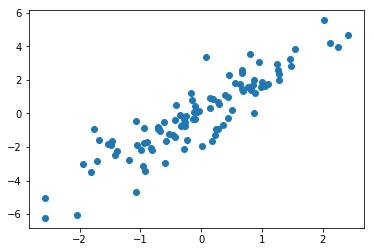

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn
#seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1]);

In [75]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([52, 22, 59, 49, 92, 20, 50, 65, 53, 96, 95, 74, 21, 32, 13, 58, 87,
       84, 83, 28])

In [76]:
selection = X[indices]
selection.shape

(20, 2)

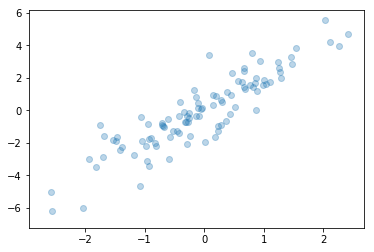

In [77]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
facecolor='none', s=200);

## Modifying Values with Fancy Indexing

In [78]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
x[i] = 99
(x)

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [80]:
x[i] = -10
x

array([  0, -10, -10,   3, -10,   5,   6,   7, -10,   9])

In [81]:
x = np.zeros(10)

In [82]:
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [87]:
x[[0,0,2,3,3,4,2]] = [4,6,3,2,1,6,5] # If we repeat values the last assigned value will be assigned

In [103]:
x = np.zeros(10)
x[[0,0]] = [4,6]

In [104]:
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that x[3] would contain the value 2, and x[4] would contain the value 3, as this is how many times each index is repeated. Why is this not the case? Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1 . x[i] + 1 is evaluated, and then the result is assigned to the indices in x . With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

In [108]:
# For the other behaviour
x = np.zeros(10)
np.add.at(x,i,1)

In [109]:
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

## Example: Binning Data

In [110]:
np.random.seed(42)
x = np.random.randn(100)

In [112]:
# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [114]:
# find the appropriate bin for each x
i = np.searchsorted(bins, x)

In [118]:
np.add.at(counts, i, 1)
# add 1 to each of these bins

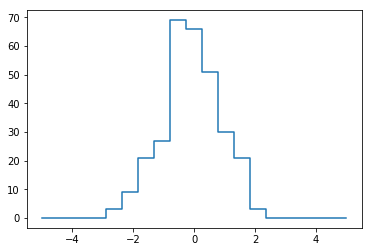

In [119]:
# plot the results
plt.plot(bins, counts, linestyle='steps');